In [66]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns
from plotly.offline import iplot , plot       
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

In [69]:
train = pd.read_csv(r"F:\Data Anal ;)\ML\Data\Cardiovascular\cardio_train.csv", sep=";")

# Checking the Data

In [70]:
train

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [40]:
train.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [41]:
print(f"Number of Row : {train.shape[0]}\nNumber of Columns : {train.shape[1]}")

Number of Row : 70000
Number of Columns : 13


In [42]:
pd.DataFrame({'Count':train.shape[0],
              'Null':train.isnull().sum(),
              'Null %':train.isnull().mean() * 100,
              'Cardinality':train.nunique()
})

,Count,Null,Null %,Cardinality
id,70000,0,0.0,70000
age,70000,0,0.0,8076
gender,70000,0,0.0,2
height,70000,0,0.0,109
weight,70000,0,0.0,287
ap_hi,70000,0,0.0,153
ap_lo,70000,0,0.0,157
cholesterol,70000,0,0.0,3
gluc,70000,0,0.0,3
smoke,70000,0,0.0,2


In [43]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [44]:
train.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

# Feature Engineering And EDA: 

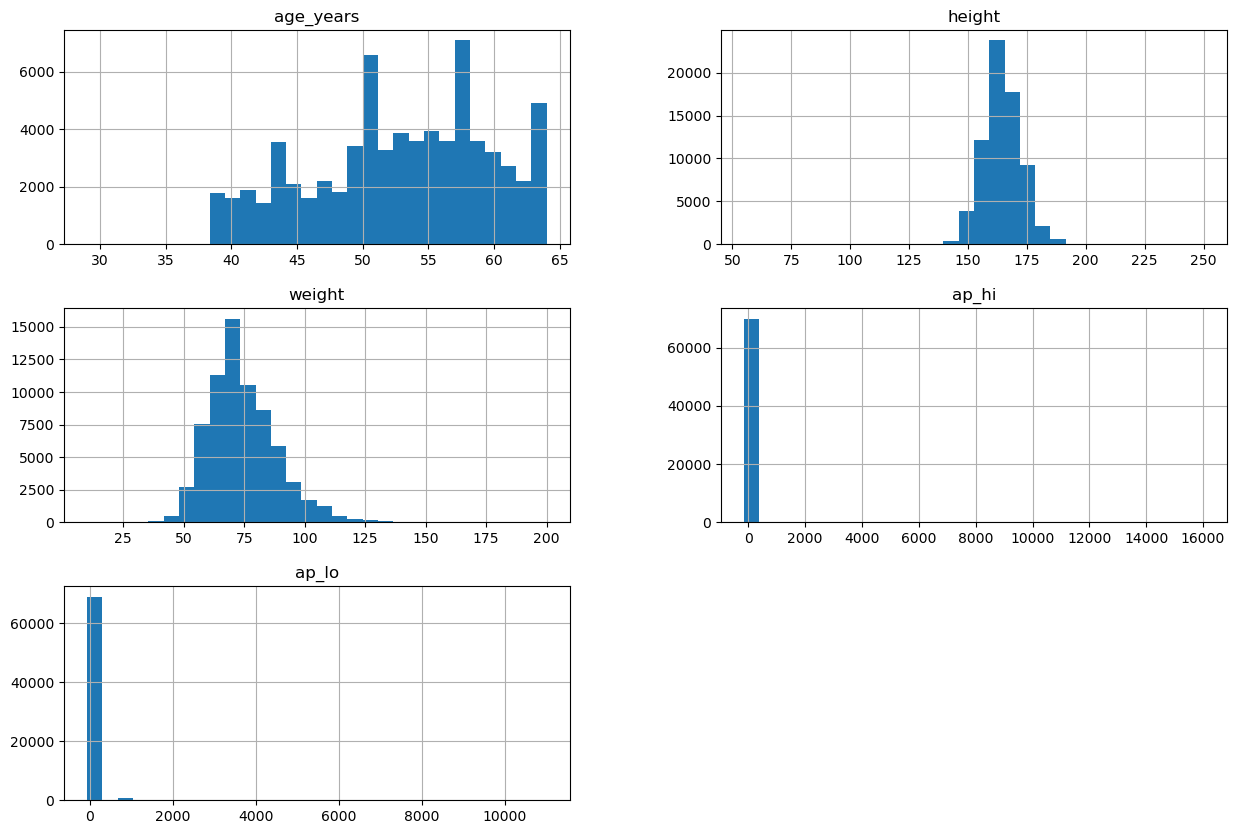

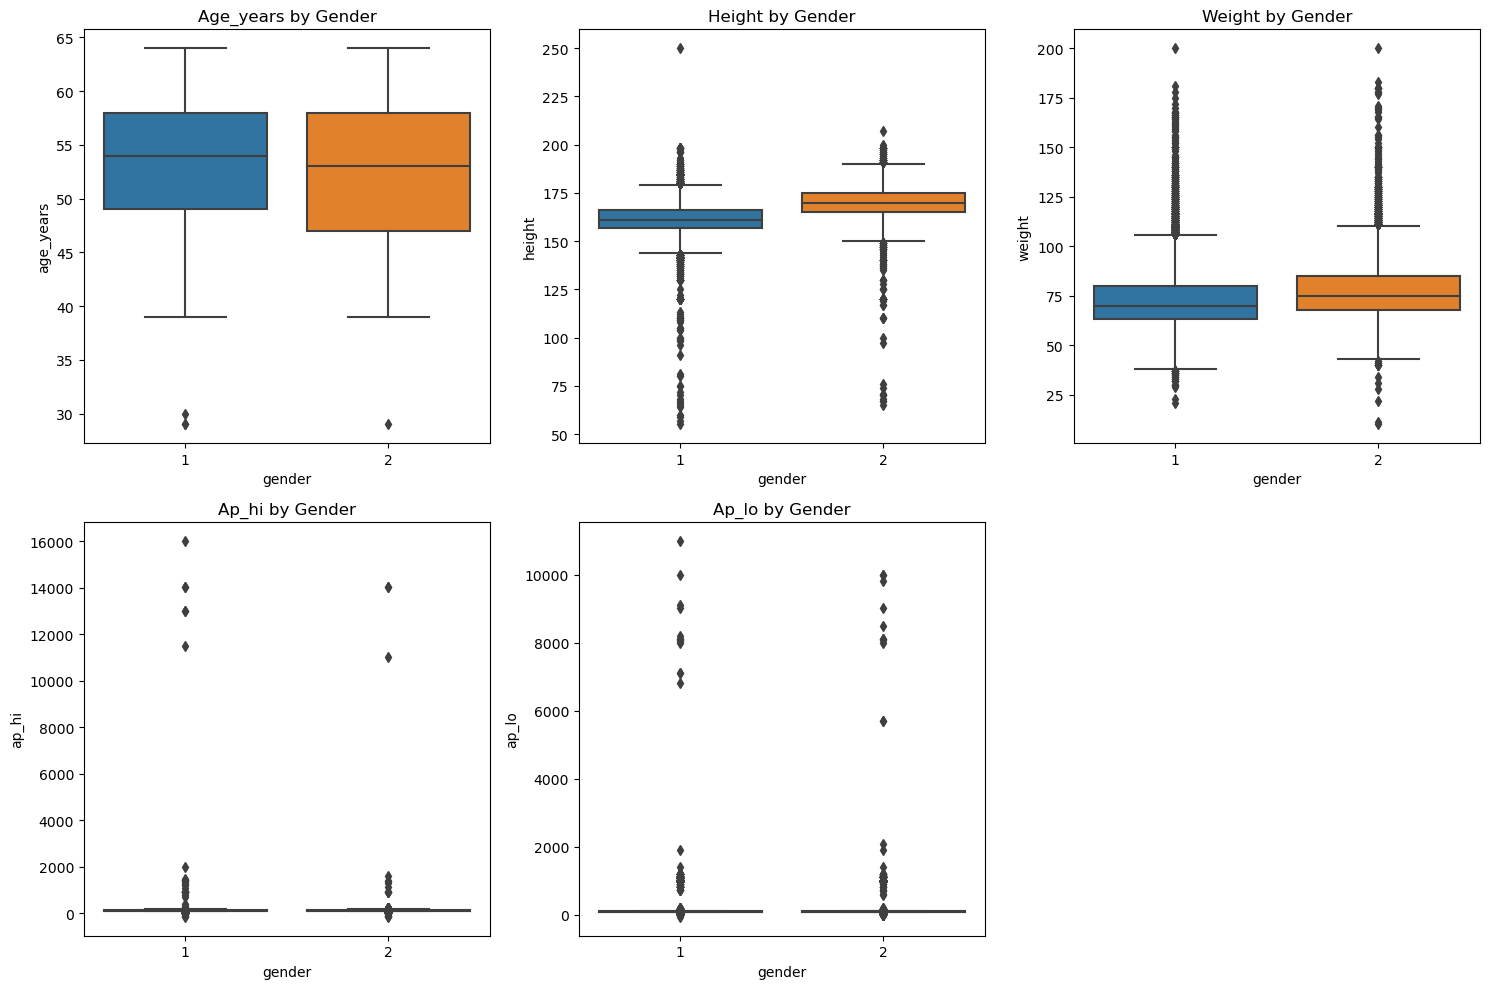

In [45]:
# Convert age from days to years
train['age_years'] = train['age'] // 365

# 1.1 Histograms for continuous variables
continuous_vars = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo']
train[continuous_vars].hist(figsize=(15, 10), bins=30)
plt.show()

# 1.2 Box plots for health indicators by gender
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='gender', y=var, data=train)
    plt.title(f'{var.capitalize()} by Gender')
plt.tight_layout()
plt.show()

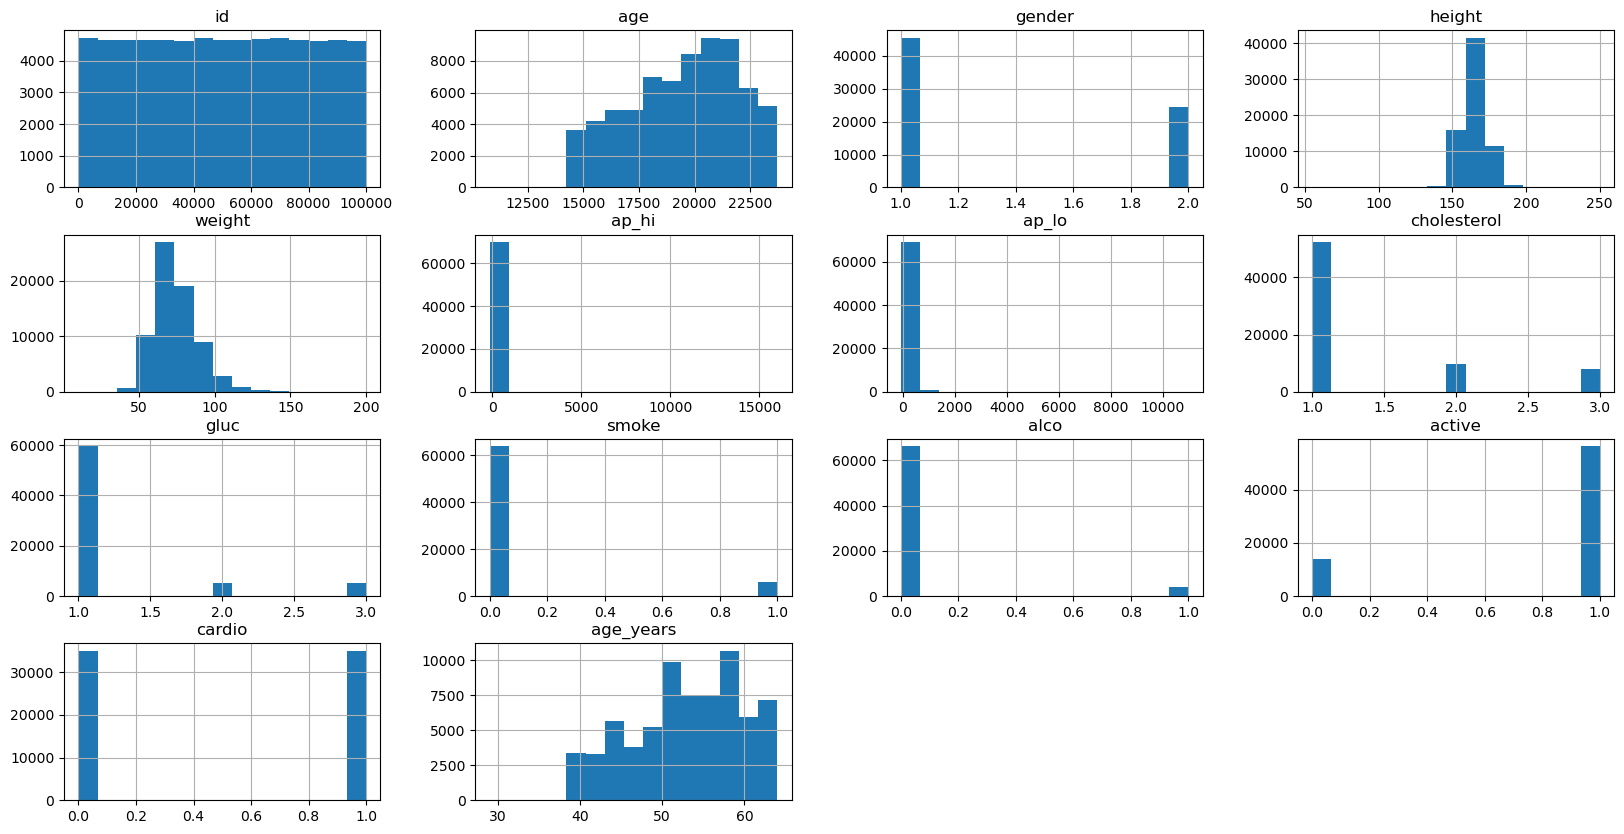

In [46]:
train.hist(bins=15, figsize=(20, 10))
plt.show()

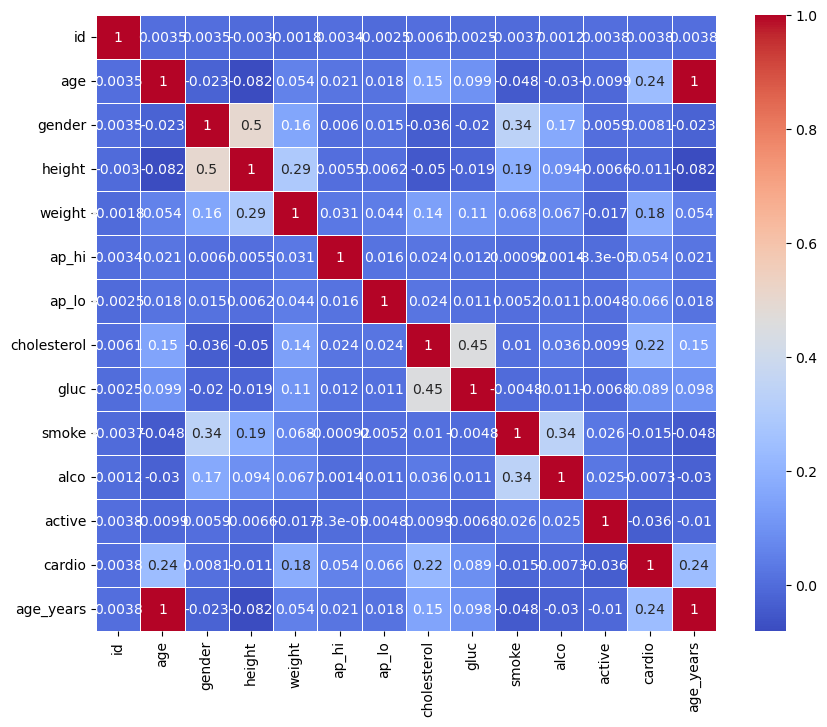

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [48]:
train.drop(columns='age',inplace=True)

# Removing Outlier

In [49]:
for col in train.columns:
    q1 = train[col].quantile(0.25)
    q3 = train[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)]
    print(f'{col} Outliers: {len(outliers)}')

id Outliers: 0
gender Outliers: 0
height Outliers: 519
weight Outliers: 1819
ap_hi Outliers: 1435
ap_lo Outliers: 4632
cholesterol Outliers: 0
gluc Outliers: 10521
smoke Outliers: 6169
alco Outliers: 3764
active Outliers: 13739
cardio Outliers: 0
age_years Outliers: 4


In [50]:
def remove_outliers(train, column):
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_out = train[~((train[column] < lower_bound) | (train[column] > upper_bound))]
    return train_out

# Apply to all numerical columns
for col in train.columns:
    train = remove_outliers(train, col)

In [51]:
train

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48
8,13,1,158,71.0,110,70,1,1,0,0,1,0,48
10,15,1,169,80.0,120,80,1,1,0,0,1,0,61
11,16,2,173,60.0,120,80,1,1,0,0,1,0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69989,99985,1,157,83.0,120,70,1,1,0,0,1,1,57
69990,99986,1,168,72.0,110,70,1,1,0,0,1,1,41
69992,99990,1,161,56.0,170,90,1,1,0,0,1,1,51
69993,99991,1,172,70.0,130,90,1,1,0,0,1,1,53


In [52]:
x = train.drop(columns=['cardio','id','cholesterol','gluc','smoke','alco','active'])
y = train['cardio']


In [53]:
from imblearn.over_sampling import SMOTE
x, y = SMOTE(random_state=42).fit_resample(x,y)

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xcols = x.columns
x= sc.fit_transform(x)
x = pd.DataFrame(x,columns=xcols)

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [57]:
model.fit(x_train, y_train)

LogisticRegression()

In [58]:
prediction = model.predict(x_test)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      5429
           1       0.75      0.65      0.69      5422

    accuracy                           0.71     10851
   macro avg       0.72      0.71      0.71     10851
weighted avg       0.72      0.71      0.71     10851



In [60]:
model.score(x_train, y_train), model.score(x_test, y_test)

(0.7135126594778213, 0.7127453690904064)

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

# Create the model
logreg = LogisticRegression(solver='liblinear')

# Grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'C': 0.1, 'penalty': 'l1'}
Best cross-validation score: 0.7139074439315805


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

x = train.drop(columns=['cardio','id','cholesterol','gluc','smoke','alco','active'])
y = train['cardio']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=42)

model = GradientBoostingClassifier()
model.fit(x_train,y_train)
prediction = model.predict(x_test)

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79      5471
           1       0.73      0.58      0.64      3964

    accuracy                           0.73      9435
   macro avg       0.73      0.71      0.71      9435
weighted avg       0.73      0.73      0.73      9435



In [64]:
model.score(x_train, y_train), model.score(x_test, y_test)

(0.7351231034796039, 0.7324854266030737)

In [65]:
import joblib
joblib.dump(model,'model.pkl')
joblib.dump(sc,'scaler.pkl')

['scaler.pkl']